#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline

#### Import Data

In [3]:
df = pd.read_csv('Data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.shape

(9134, 24)

#### Variable Encoding

In [6]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x == 'Yes' else 0)

In [7]:
df['Engaged'].describe()

count    9134.000000
mean        0.143201
std         0.350297
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Engaged, dtype: float64

In [8]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

##### - Creating Dummy Variables

In [9]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type', 
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]

categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    
    categorical_features += list(encoded_df.columns)
    
    df = pd.concat([df, encoded_df], axis=1)

In [11]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Married,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,0,1,0,0,0,0,1,0,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,1,1,0,0,0,0,0,1,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,1,0,1,0,0,0,0,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,1,0,1,0,0,0,0,1,0,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,1,0,0,0,0,1,0,0


##### - Encoding Gender

In [12]:
df['Is.Female'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

categorical_features.append('Is.Female')

In [13]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,0,0,0,0,1,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,1,1,0,0,0,0,0,1,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,1,0,0,0,0,0,0,1,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,1,0,0,0,0,1,0,0,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,1,0,0,0,0,1,0,0,0


##### - all features & response

In [14]:
all_features = continuous_features + categorical_features
response = 'Engaged'

In [15]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

In [16]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,1,0,...,1,0,0,0,0,1,0,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,1,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1,0,...,1,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,1,0,...,1,0,0,0,0,1,0,0,0,0


#### Model

##### - Training and Testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3)

In [19]:
sample_df.shape

(9134, 51)

In [21]:
x_train.shape

(6393, 50)

In [22]:
x_test.shape

(2741, 50)

##### Building RandomForest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

In [25]:
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

##### - Model Performance Evaluation for Individual Trees 

In [26]:
rf_model.estimators_

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=132416757),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=164030029),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1445485089),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=551220778),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=536223339),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1344046999),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1373388769),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1518559368),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=70902730),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=987722223),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
             

In [27]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=132416757)

In [28]:
rf_model.estimators_[0].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
rf_model.estimators_[1].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
rf_model.estimators_[2].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
rf_model.estimators_[3].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
rf_model.estimators_[4].predict(x_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##### - Feature Importances

In [33]:
rf_model.feature_importances_

array([5.87527459e-02, 9.24851759e-02, 5.25406353e-02, 3.05874530e-02,
       4.68339902e-02, 1.29181584e-02, 1.79404770e-02, 6.98399215e-02,
       3.73128272e-02, 7.80524967e-03, 9.81765372e-03, 4.75126013e-03,
       1.05498592e-02, 5.81567452e-03, 1.57543019e-02, 3.28201133e-03,
       1.01483067e-04, 3.99149308e-03, 4.41473108e-03, 3.42478681e-03,
       3.16154482e-03, 7.80352043e-04, 1.51658937e-03, 8.13639268e-04,
       1.07304509e-03, 1.89301448e-03, 2.38070105e-03, 1.54874612e-03,
       7.43612289e-04, 1.11260648e-03, 7.12036456e-04, 7.31783712e-04,
       6.63023297e-04, 8.29058954e-03, 2.80581666e-02, 8.89645364e-03,
       2.97959901e-01, 2.84809532e-02, 3.47707513e-02, 2.08886905e-02,
       1.91882834e-02, 4.53288484e-03, 7.04716965e-03, 4.51438792e-03,
       4.91540209e-03, 5.18298912e-03, 5.33278702e-03, 5.41840001e-03,
       2.90003052e-03, 7.57157621e-03])

In [34]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)

,feature.importance,feature
36,0.297960,EmploymentStatus.Retired
1,0.092485,Income
7,0.069840,Total.Claim.Amount
0,0.058753,Customer.Lifetime.Value
2,0.052541,Monthly.Premium.Auto
4,0.046834,Months.Since.Policy.Inception
8,0.037313,Sales.Channel.Agent
38,0.034771,Marital.Status.Divorced
3,0.030587,Months.Since.Last.Claim
37,0.028481,EmploymentStatus.Unemployed


#### Model Performance Evaluation

##### - Accuracy, Precision, and Recall

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [36]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [37]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8739
Out-of-Sample Accuracy: 0.8825


In [38]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9783
Out-of-Sample Precision: 0.8529


In [39]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1439
Out-of-Sample Recall: 0.1568


##### - ROC & AUC

In [40]:
from sklearn.metrics import roc_curve, auc

In [41]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [42]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [43]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8794
Out-Sample AUC: 0.8398


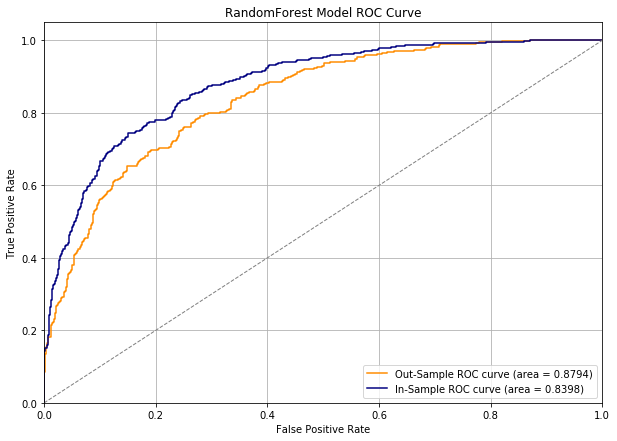

In [44]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()